In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
from google.colab.patches import cv2_imshow

# 구글 landmark 모델 설치 및 기본 함수 정의

In [2]:
!pip install -q mediapipe==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 38.5 MB/s eta 0:00:00


In [3]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmark

In [5]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

# 사진 위 랜드마크 출력

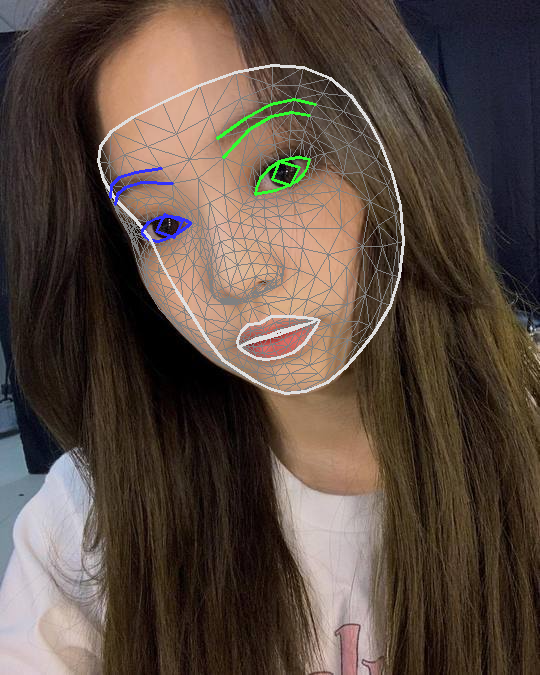

In [6]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/제니.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))



# 뺨 위치 출력
### 오른쪽 뺨: 랜드마크 인덱스 280
### 왼쪽 뺨: 랜드마크 인덱스 50
### 해당 위치의 좌표를 코드로 출력

In [21]:
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Load the image
img = cv2.imread("/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/제니.jpg")

# Convert the image to RGB (MediaPipe uses RGB images)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process the image to find face landmarks
results = face_mesh.process(img_rgb)

# Check if landmarks were found
if results.multi_face_landmarks:
    # Get the landmarks for the first face
    landmarks = results.multi_face_landmarks[0].landmark

    # Print the x, y coordinates of the right cheek landmark
    print("Right cheek landmark (280):", landmarks[280])

    # Print the x, y coordinates of the left cheek landmark
    print("Left cheek landmark (50):", landmarks[50])

Right cheek landmark (280): x: 0.6324313282966614
y: 0.3388538360595703
z: -0.027088867500424385

Left cheek landmark (50): x: 0.3045780062675476
y: 0.4418182373046875
z: 0.057510726153850555



In [8]:
# Get the x, y coordinates of the right cheek landmark
x_right, y_right = int(landmarks[280].x * img.shape[1]), int(landmarks[280].y * img.shape[0])
# Get the x, y coordinates of the left cheek landmark
x_left, y_left = int(landmarks[50].x * img.shape[1]), int(landmarks[50].y * img.shape[0])

In [9]:
x_right, y_right

(341, 228)

In [10]:
x_left, y_left

(164, 298)

# x,y 좌표로 나오는 값은 기본이 RGB 색공간에서의 값
# RGB -> HSV로 변환

In [11]:
# Convert the image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Get the HSV value at the right cheek landmark position
hsv_value_right = img_hsv[y_right, x_right]

# Get the HSV value at the left cheek landmark position
hsv_value_left = img_hsv[y_left, x_left]

# Print the HSV values
print("HSV value at the right cheek landmark position:", hsv_value_right)
print("HSV value at the left cheek landmark position:", hsv_value_left)


HSV value at the right cheek landmark position: [ 12 112 200]
HSV value at the left cheek landmark position: [ 11 106 198]


# 오른쪽 뺨, 왼쪽 뺨 HSV 값 시각화

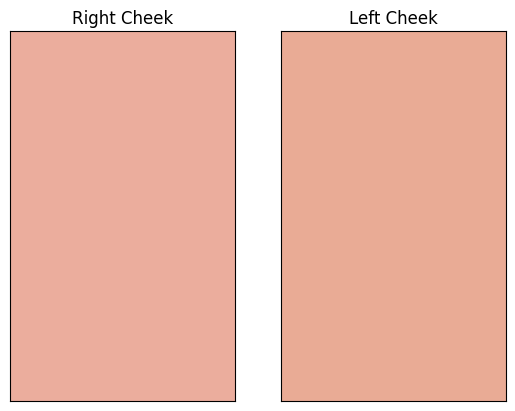

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Convert the HSV values to the range 0-1
hsv_right = np.array([9, 85, 235]) / 255.0
hsv_left = np.array([11, 92, 233]) / 255.0

# Convert the HSV colors to RGB
rgb_right = mcolors.hsv_to_rgb(hsv_right)
rgb_left = mcolors.hsv_to_rgb(hsv_left)

# Create a figure and axes
fig, ax = plt.subplots(1, 2)

# Set the colors of the axes
ax[0].set_facecolor(rgb_right)
ax[1].set_facecolor(rgb_left)

# Remove the x and y ticks
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

# Set the titles
ax[0].set_title('Right Cheek')
ax[1].set_title('Left Cheek')

plt.show()

# 두 뺨 위치 HSV값의 평균을 구해 하나의 대표값 만들기

In [13]:
# Calculate the average RGB value
average_hsv = np.mean([hsv_value_right, hsv_value_left], axis=0)

# Print the average RGB value
print("Average HSV value:", average_hsv)

Average HSV value: [ 11.5 109.  199. ]


In [14]:
average_hsv[1]

109.0

# 4계절 HSV 기준값에 의해 봄여름가을겨울 사계절 구분하기

In [19]:
# 함수
# 기준값에 따라 분류하기

def color_classifier(average_hsv) :

    # 입력값 Hue, Sturation, Value에 따라 변수 지정
    H = float(average_hsv[0])
    S = float(average_hsv[1])
    V = float(average_hsv[2])
    diff = round(V - S, 2)

    color_type = ["봄 웜톤", "여름 쿨톤", "가을 웜톤", "겨울 쿨톤"]

    if H >= 23 and H <= 203 :
        if diff >= 46.25 :
            return "봄 웜톤"
        else :
            return "여름 쿨톤"


    elif (H >= 0 and H < 23) or (H > 203 and H <= 360) :
        if diff >= 48.75 :
            return "가을 웜톤"

        else :
            return "겨울 쿨톤"

In [20]:
color_classifier(average_hsv)

'가을 웜톤'

# 연예인 사진 100장으로 성능 확인
# 1. 연예인 웜톤 50장

In [53]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the directory of the images
image_dir = "/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg"

# Get a list of all image paths in the directory
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith((".jpg", ".jpeg"))]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
image_paths

['/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/로제.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/공효진.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/솔빈.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/박민영.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/문가영.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/박시연.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/박정아.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/김유정.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/서현.jpeg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/문정원.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터ᄉ

In [45]:
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Function to process each image
def process_image(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to RGB (MediaPipe uses RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process the image to find face landmarks
    results = face_mesh.process(img_rgb)

    # Check if landmarks were found
    if results.multi_face_landmarks:
        # Get the landmarks for the first face
        landmarks = results.multi_face_landmarks[0].landmark

        # Get the x, y coordinates of the right cheek landmark
        x_right, y_right = int(landmarks[280].x * img.shape[1]), int(landmarks[280].y * img.shape[0])
        # Get the x, y coordinates of the left cheek landmark
        x_left, y_left = int(landmarks[50].x * img.shape[1]), int(landmarks[50].y * img.shape[0])

        # Convert the image to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Get the HSV value at the right cheek landmark position
        hsv_value_right = img_hsv[y_right, x_right]

        # Get the HSV value at the left cheek landmark position
        hsv_value_left = img_hsv[y_left, x_left]

        # Calculate the average HSV value
        average_hsv = np.mean([hsv_value_right, hsv_value_left], axis=0)

        # Classify the color
        color_type = color_classifier(average_hsv)

        # Print the result
        print(f"Image: {img_path}, Color Type: {color_type}")

# Process each image
for img_path in image_paths:
    process_image(img_path)


Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/로제.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/공효진.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/솔빈.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/박민영.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/문가영.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/박시연.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/박정아.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg/김유정.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/proto

# csv로 저장하고 싶다면

In [38]:
# import csv

# # Specify the CSV file path
# csv_file_path = "/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/랜드마크뺨2개_연예인웜톤50장.csv"
# color_type = color_classifier(average_hsv)

# # Open the CSV file in write mode
# with open(csv_file_path, 'w', newline='') as file:
#     writer = csv.writer(file)

#     # Write the header
#     writer.writerow(["Image", "Average HSV", "Color Type"])

#     # Loop over each image path
#     for image_path in image_paths:
#         # Your code to process each image and get the average HSV and color type
#         # ...

#         # Write the results to the CSV file
#         writer.writerow([image_path, average_hsv, color_type])

# 2. 연예인 쿨톤 50장

In [48]:
# Specify the directory of the images
image_dir = "/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg"

# Get a list of all image paths in the directory
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith((".jpg", ".jpeg"))]

In [49]:
image_paths

['/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/손나은.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김태리.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/고현정.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/서현진.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/고아라.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김옥빈.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/선우선.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김새롬.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/나연.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김혜수.jpg',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/미미.jpg',
 '/conten

In [51]:
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Function to process each image
def process_image(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to RGB (MediaPipe uses RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process the image to find face landmarks
    results = face_mesh.process(img_rgb)

    # Check if landmarks were found
    if results.multi_face_landmarks:
        # Get the landmarks for the first face
        landmarks = results.multi_face_landmarks[0].landmark

        # Get the x, y coordinates of the right cheek landmark
        x_right, y_right = int(landmarks[280].x * img.shape[1]), int(landmarks[280].y * img.shape[0])
        # Get the x, y coordinates of the left cheek landmark
        x_left, y_left = int(landmarks[50].x * img.shape[1]), int(landmarks[50].y * img.shape[0])

        # Convert the image to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Get the HSV value at the right cheek landmark position
        hsv_value_right = img_hsv[y_right, x_right]

        # Get the HSV value at the left cheek landmark position
        hsv_value_left = img_hsv[y_left, x_left]

        # Calculate the average HSV value
        average_hsv = np.mean([hsv_value_right, hsv_value_left], axis=0)

        # Classify the color
        color_type = color_classifier(average_hsv)

        # Print the result
        print(f"Image: {img_path}, Color Type: {color_type}")

# Process each image
for img_path in image_paths:
    process_image(img_path)

Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/손나은.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김태리.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/고현정.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/서현진.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/고아라.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김옥빈.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/선우선.jpg, Color Type: 봄 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/김새롬.jpg, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg/나연.jpg, Color T

# 3. 일반인 이미지 100장

In [31]:
# Specify the directory of the images
image_dir = "/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장"

# Get a list of all image paths in the directory
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(".JPG")]

In [32]:
image_paths

['/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0295_IND_D_13_0_04.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0295_IND_D_13_0_03.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0297_IND_D_29_0_01.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_05.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_04.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_03.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_02.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_01.JPG',
 '/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0295_IND_D_13_0_05.JPG',
 '/content/drive/MyDrive/사ᄀ

In [33]:
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Function to process each image
def process_image(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to RGB (MediaPipe uses RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process the image to find face landmarks
    results = face_mesh.process(img_rgb)

    # Check if landmarks were found
    if results.multi_face_landmarks:
        # Get the landmarks for the first face
        landmarks = results.multi_face_landmarks[0].landmark

        # Get the x, y coordinates of the right cheek landmark
        x_right, y_right = int(landmarks[280].x * img.shape[1]), int(landmarks[280].y * img.shape[0])
        # Get the x, y coordinates of the left cheek landmark
        x_left, y_left = int(landmarks[50].x * img.shape[1]), int(landmarks[50].y * img.shape[0])

        # Convert the image to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Get the HSV value at the right cheek landmark position
        hsv_value_right = img_hsv[y_right, x_right]

        # Get the HSV value at the left cheek landmark position
        hsv_value_left = img_hsv[y_left, x_left]

        # Calculate the average HSV value
        average_hsv = np.mean([hsv_value_right, hsv_value_left], axis=0)

        # Classify the color
        color_type = color_classifier(average_hsv)

        # Print the result
        print(f"Image: {img_path}, Color Type: {color_type}")

# Process each image
for img_path in image_paths:
    process_image(img_path)

Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0295_IND_D_13_0_04.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0295_IND_D_13_0_03.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0297_IND_D_29_0_01.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_05.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_04.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_03.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F0296_IND_M_38_0_02.JPG, Color Type: 가을 웜톤
Image: /content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/라벨링용일반인100장/F02